### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib notebook

### Load Data

In [2]:
AppleStore = pd.read_csv('AppleStore.csv',index_col=0)
AppleStoreDescription = pd.read_csv('appleStore_description.csv')

In [3]:
AppleStoreDescription.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [4]:
AppleStore.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
# merge the two data sources into one dataframe
all_data = pd.merge(AppleStore,AppleStoreDescription,on = ['id','track_name','size_bytes'])
all_data.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


### Overview

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 17 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
app_desc            7197 non-null object
dtypes: float64(3), int64(8), object(6)
memory usage: 1012.1+ KB


In [7]:
all_data.isnull().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
app_desc            0
dtype: int64

There is no missing values in the dataset

### User Rating Distribution

<IPython.core.display.Javascript object>


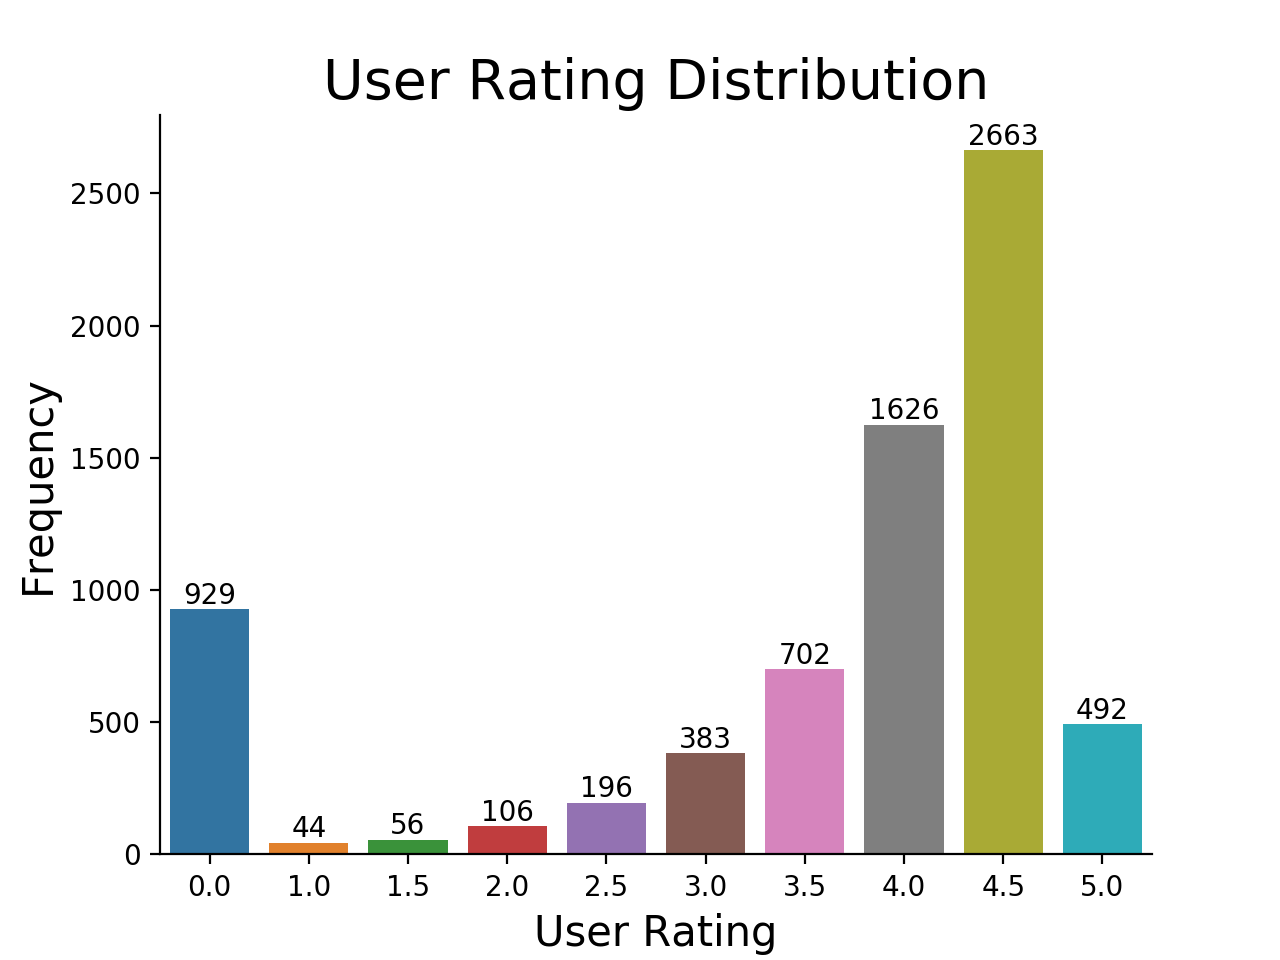

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


In [8]:
plt.figure()
sns.countplot(all_data['user_rating'])
a = plt.gca()
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
a.set_title('User Rating Distribution',fontsize = 20)
a.set_xlabel('User Rating',fontsize = 15)
a.set_ylabel('Frequency',fontsize = 15)
text_data = all_data.groupby('user_rating').agg({'id':'count'}).sort_index()
for i in range(len(a.patches)):
    x_col = a.patches[i].get_x() + a.patches[i].get_width()/2
    y_col = a.patches[i].get_height()+20
    plt.text(x_col,y_col,list(text_data['id'])[i],ha = 'center')

Basically there are more higher ratings then lower ratings. As the rating goes up, the number is also going up. Except for rating 5, there is a sharp drop from rating 4.5 to rating 5. Of course it's very hard to get a full score rating in the long run. It's also a little bit surprising, however, that there are almost 1000 ratings of 0.

### Genre Analysis

<IPython.core.display.Javascript object>


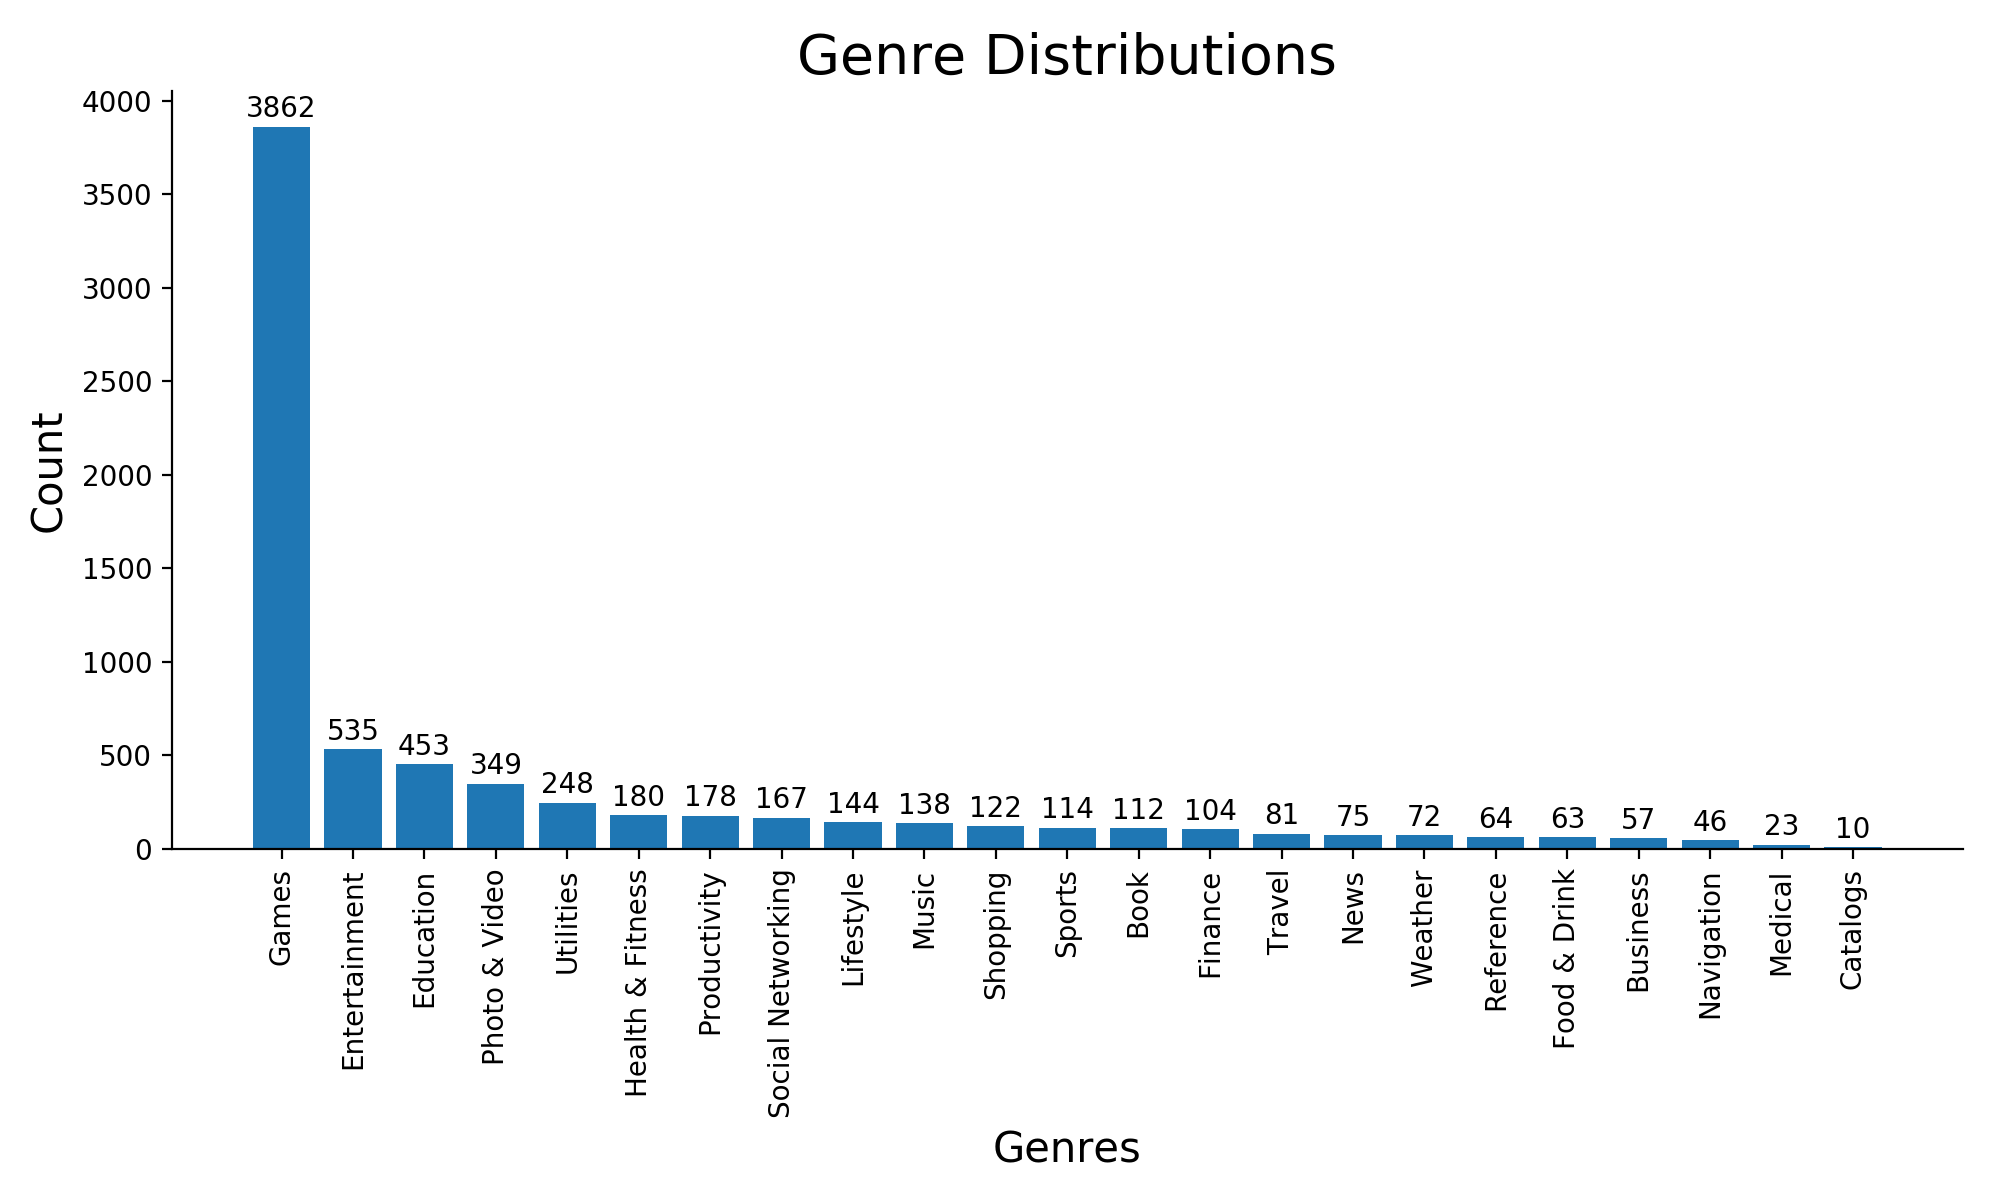

In [9]:
genre_data = all_data.groupby('prime_genre').agg({'id':'count'}).sort_values(by = 'id',ascending = False)
plt.figure(figsize = (10,6))
plt.bar(range(genre_data.shape[0]),genre_data['id'])
a = plt.gca()
a.set_xticks(range(genre_data.shape[0]))
a.set_xticklabels(genre_data.index,rotation = 90)
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
a.set_title('Genre Distributions',fontsize = 20)
a.set_ylabel('Count',fontsize = 15)
a.set_xlabel('Genres',fontsize = 15)
for i in range(genre_data.shape[0]):
    x_col = a.patches[i].get_x() + a.patches[i].get_width()/2
    y_col = a.patches[i].get_height()+50
    plt.text(x_col,y_col,list(genre_data['id'])[i],ha = 'center')
plt.tight_layout()

More than half of the apps are Games, following by Entertainment, Education, Photo & Videos, etc.

In [10]:
by_genre = all_data.groupby('prime_genre').agg({'user_rating':'mean','prime_genre':'count'}).sort_values(by = 'user_rating',ascending = False)
by_genre

,user_rating,prime_genre
prime_genre,,
Productivity,4.005618,178
Music,3.978261,138
Photo & Video,3.800860,349
Business,3.745614,57
Health & Fitness,3.700000,180
Games,3.685008,3862
Weather,3.597222,72
Shopping,3.540984,122
Reference,3.453125,64


<IPython.core.display.Javascript object>


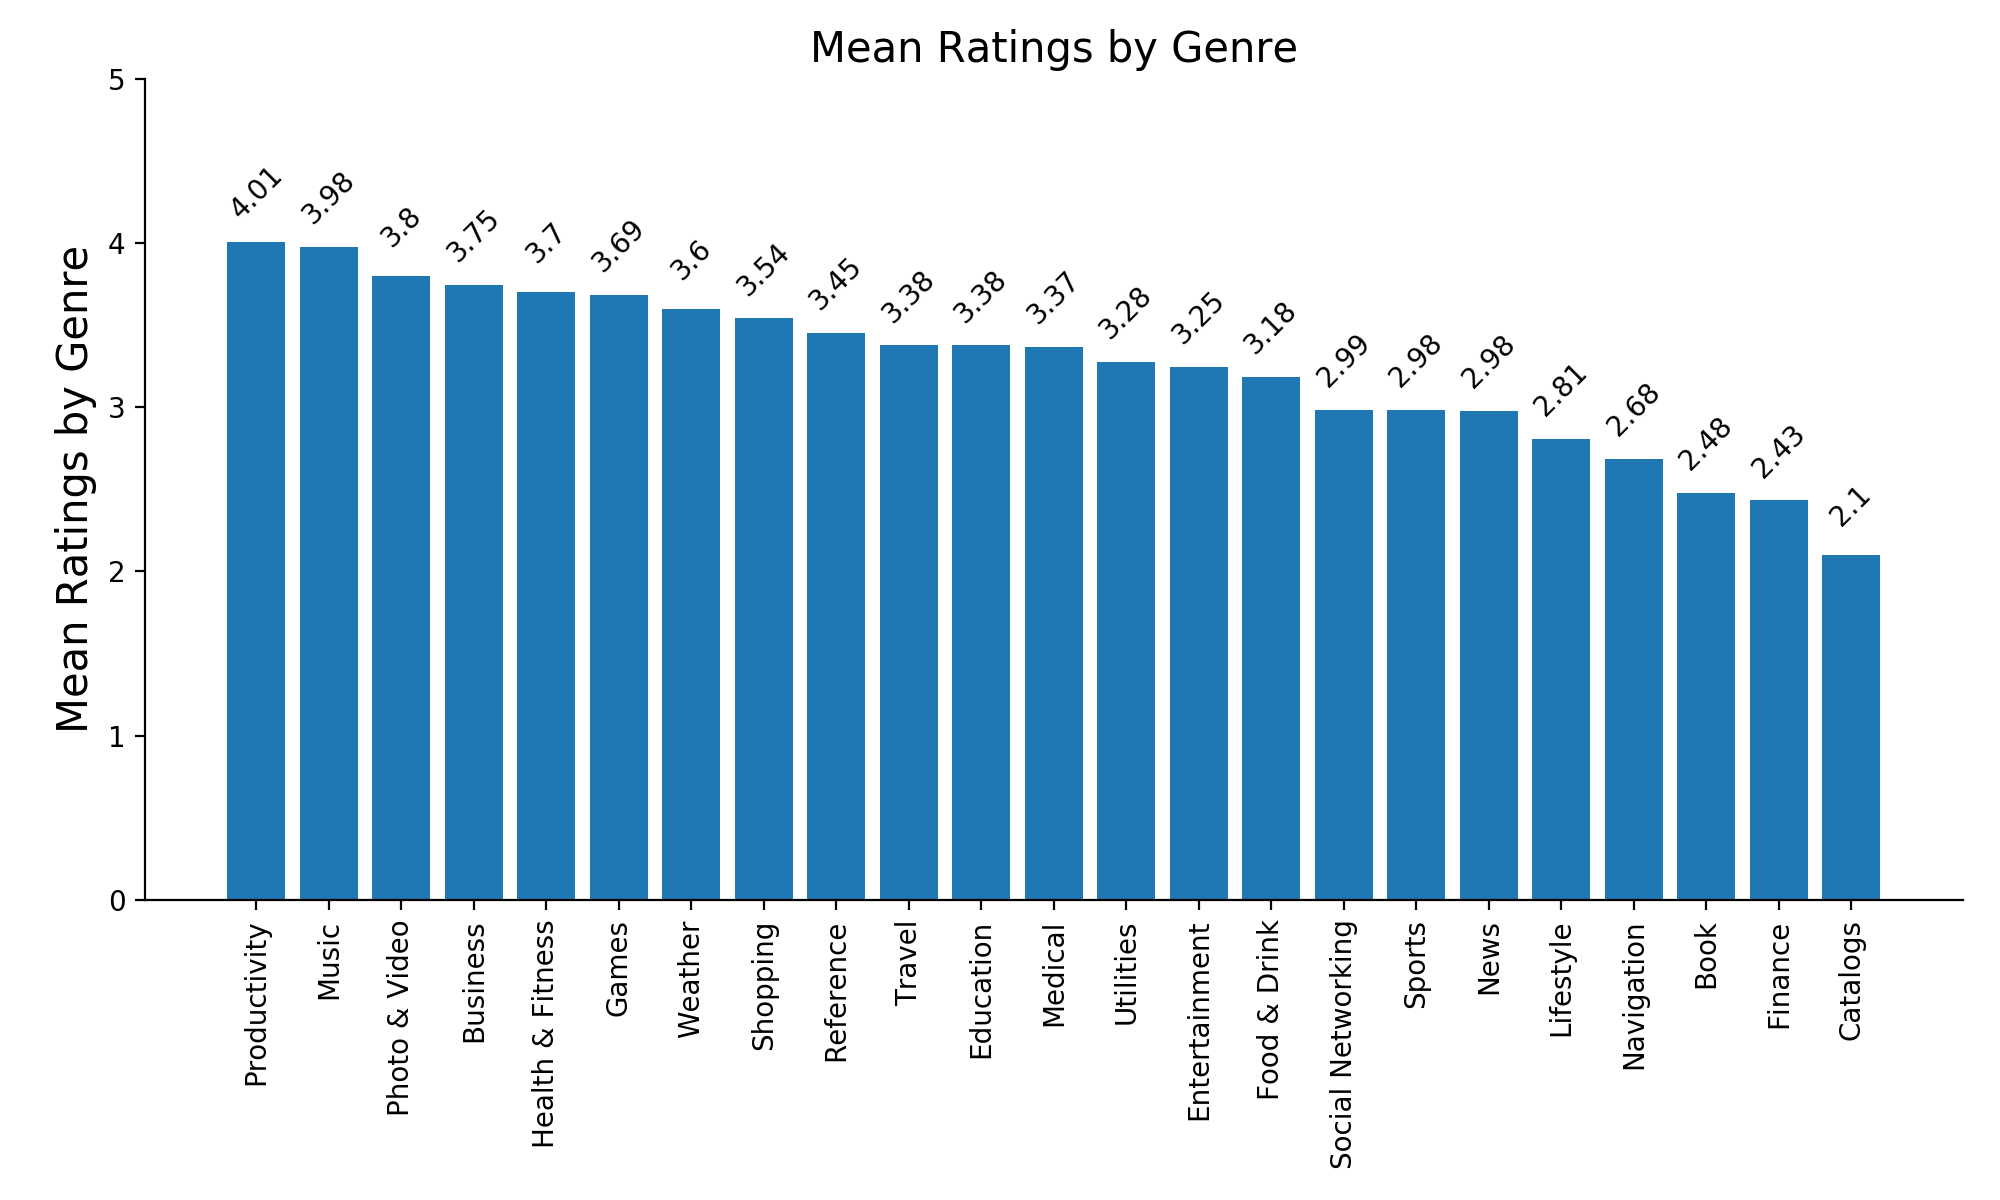

(0, 5)

In [11]:
plt.figure(figsize = (10,6))
plt.bar(range(by_genre.shape[0]),by_genre['user_rating'])
a = plt.gca()
a.set_xticks(range(by_genre.shape[0]))
a.set_xticklabels(by_genre.index,rotation = 90)
a.spines['top'].set_visible(False)
a.spines['right'].set_visible(False)
for i in range(len(by_genre)):
        x_co = a.patches[i].get_x()+a.patches[i].get_width()/2
        y_co = a.patches[i].get_height()+0.3
        a.text(x = x_co,y = y_co,s = np.round(by_genre['user_rating'][i],2),ha = 'center',va = 'center',color = 'black',rotation = 45)
plt.ylabel('Mean Ratings by Genre',fontsize = 15)
plt.title('Mean Ratings by Genre',fontsize = 15)
plt.tight_layout()
plt.ylim(0,5)

It seems the Productivity, Music, Photo & Videos, and Business apps are more likely to get higher ratings. While the Catalogs, Finance, Book, Navigation apps are more likely to get lower ratings.

### Version Number

In [12]:
# Extract the prime version number
all_data['ver_num'] = [int(x[0]) for x in all_data['ver'].str.findall(r'\d+')]

In [13]:
#eliminate some version numbers higher than 50 as outliers
ver_50 = all_data[all_data['ver_num'] < 50]

<IPython.core.display.Javascript object>


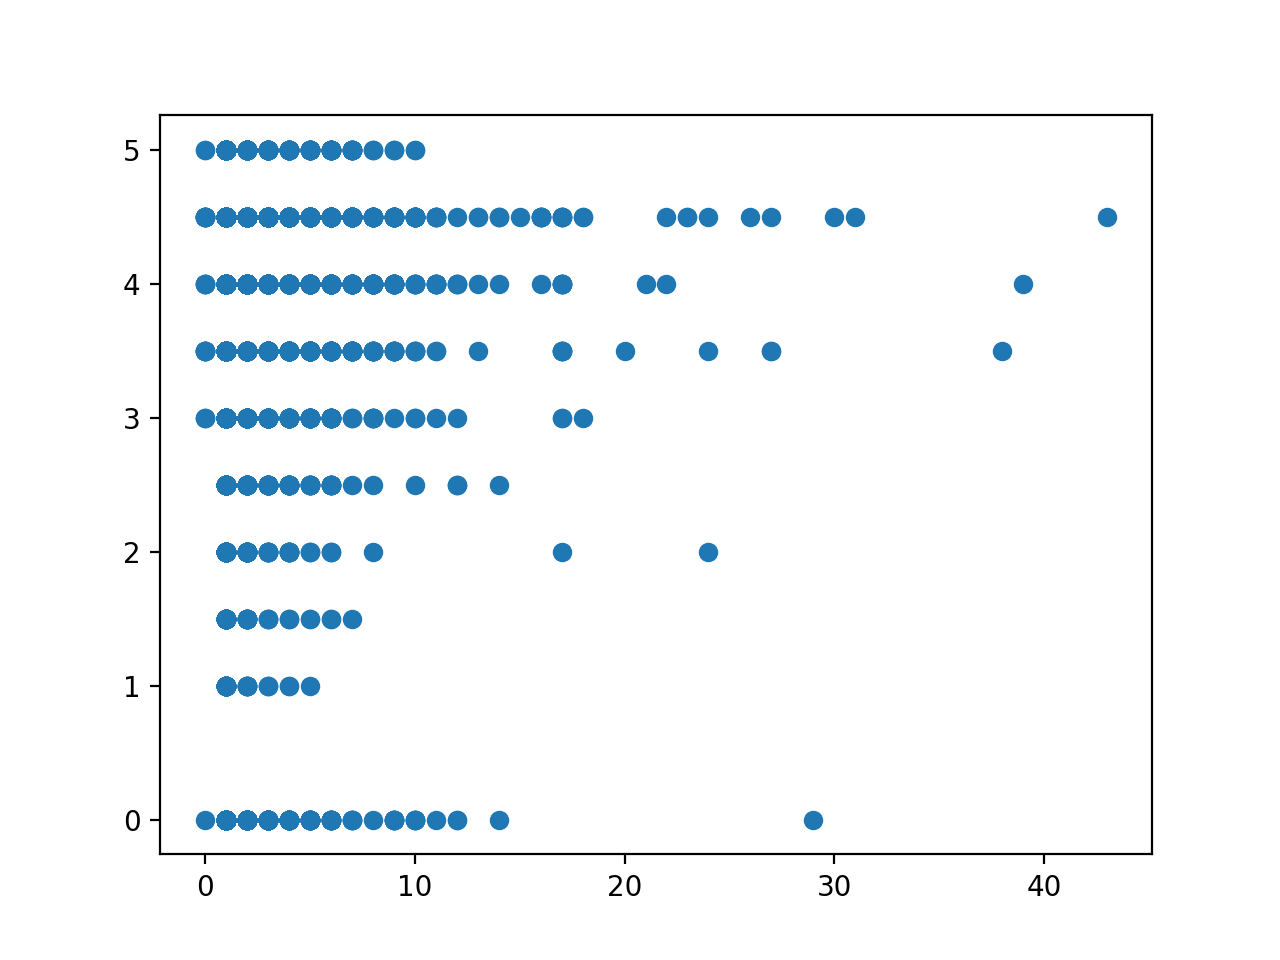

In [14]:
plt.figure()
plt.scatter('ver_num','user_rating',data = ver_50)

Seems those apps with bigger version numbers are more likely to get higher ratings. Apps with bigger version numbers indicates that those apps are more frequently modified by their development team. Maybe that's the reason why these apps are more likely to get welcomed by custmers as the teams put more efforts on the apps.

### Free-app vs Charge-app

In [15]:
all_data.loc[all_data['price']==0,'free_app'] = 1
all_data.loc[all_data['price']!=0,'free_app'] = 0

In [16]:
all_data.groupby('free_app').agg({'user_rating':'mean','free_app':'count'})

,user_rating,free_app
free_app,,
0.0,3.720949,3141
1.0,3.376726,4056


There are 3141 charge apps and 4056 free apps. But the mean ratings of free apps is a little bit lower than that of charge apps.

<IPython.core.display.Javascript object>


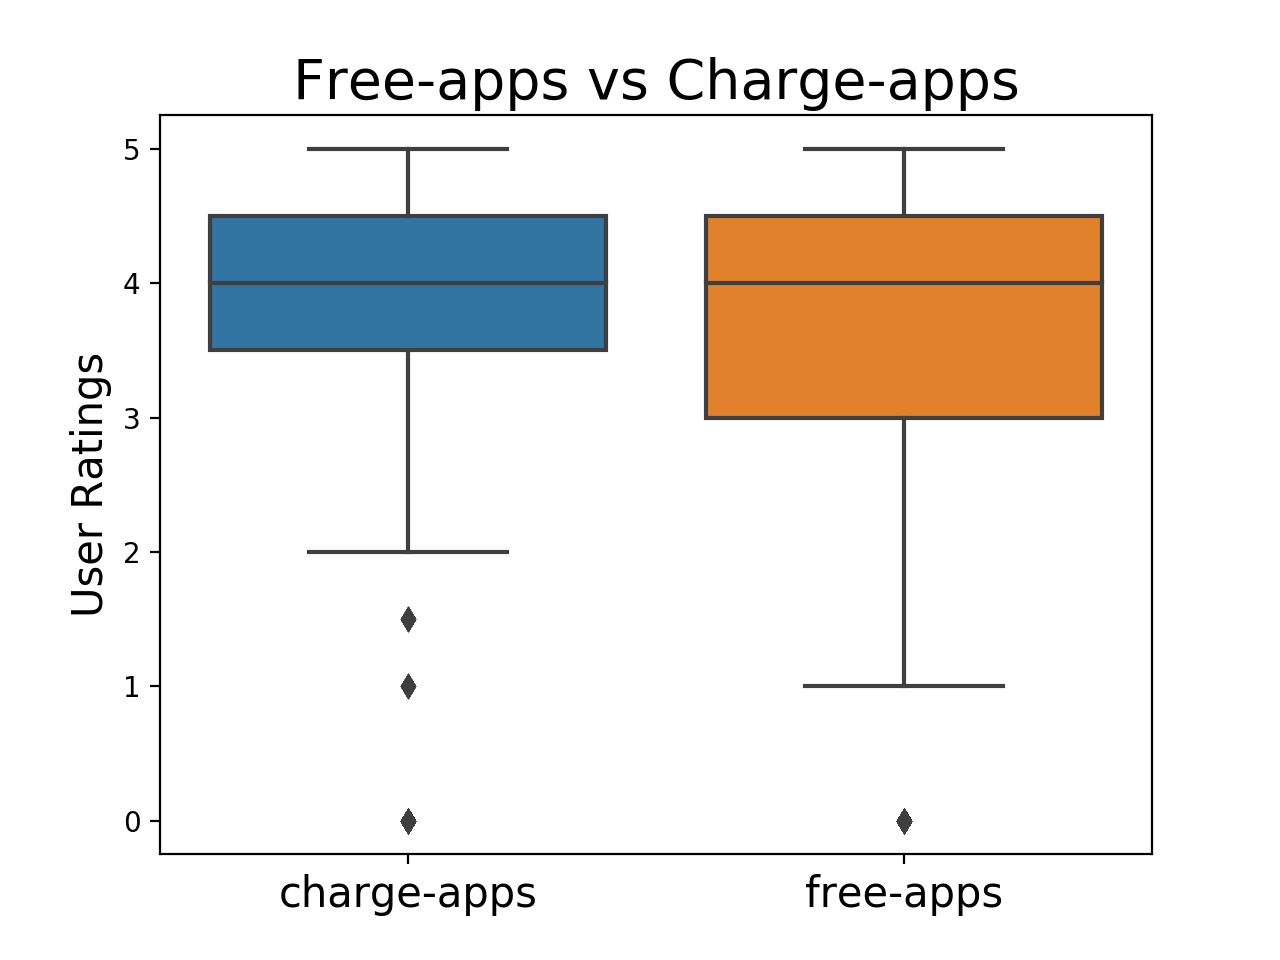

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[<matplotlib.text.Text at 0x11441bb70>, <matplotlib.text.Text at 0x114421278>]

In [17]:
plt.figure()
sns.boxplot(x = 'free_app', y = 'user_rating', data = all_data)
plt.title('Free-apps vs Charge-apps',fontsize = 20)
plt.ylabel('User Ratings',fontsize = 15)
plt.xlabel('',fontsize = 15)
a = plt.gca()
a.set_xticklabels(['charge-apps','free-apps'],fontsize = 15)

From the box plot, we could tell that free apps has more ones with ratings lower than 4. And that makes the mean ratings of free apps lower.

### Rating Count

<IPython.core.display.Javascript object>


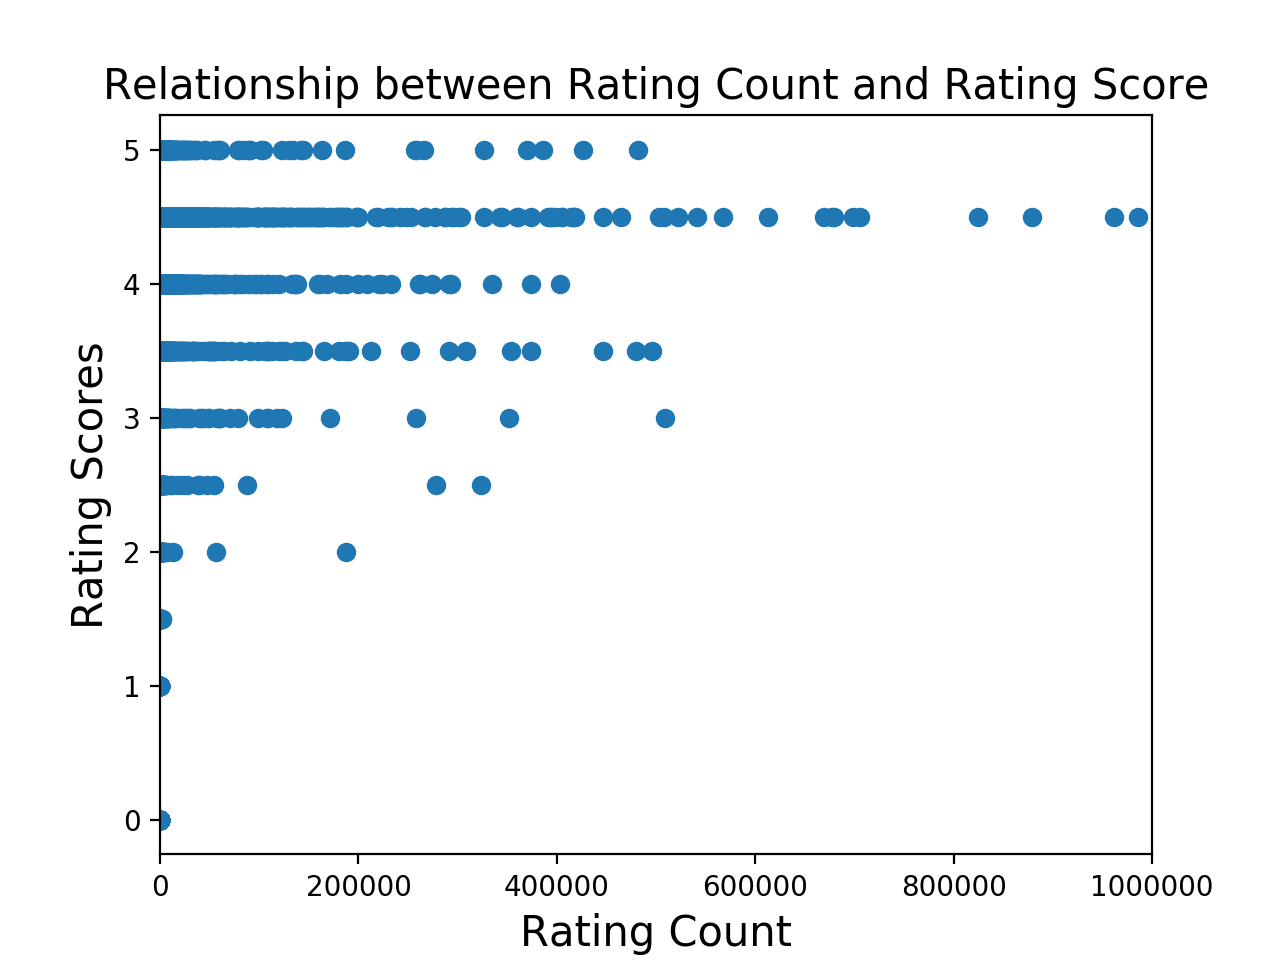

In [18]:
plt.figure()
plt.scatter('rating_count_tot','user_rating',data = all_data)
# Hide some records with extremely high rating count
plt.xlim(0,1000000)
plt.title('Relationship between Rating Count and Rating Score',fontsize = 15)
plt.ylabel('Rating Scores',fontsize = 15)
plt.xlabel('Rating Count',fontsize = 15)


apps with high rating count are less likely to have low ratings. 

### App Size

In [19]:
all_data['size_M'] = all_data['size_bytes']/(1024*1024)

<IPython.core.display.Javascript object>


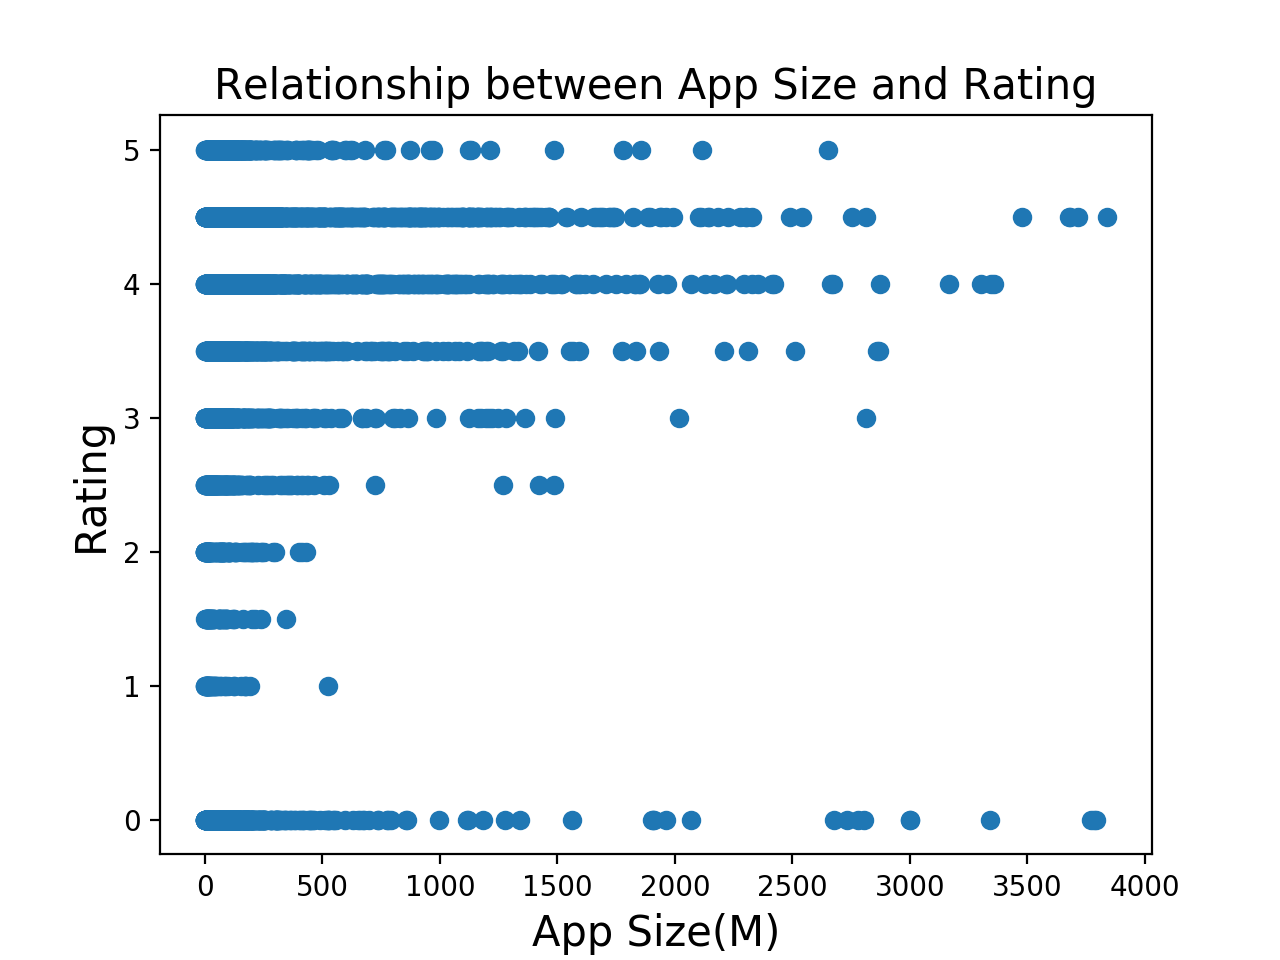

In [20]:
plt.figure()
plt.scatter('size_M','user_rating',data = all_data)
plt.title('Relationship between App Size and Rating',fontsize = 15)
plt.xlabel('App Size(M)',fontsize = 15)
plt.ylabel('Rating',fontsize = 15)

Apps with large size usually have extreme ratings, either extremely high or extremely low.

### Number of Supporting Languages

<IPython.core.display.Javascript object>


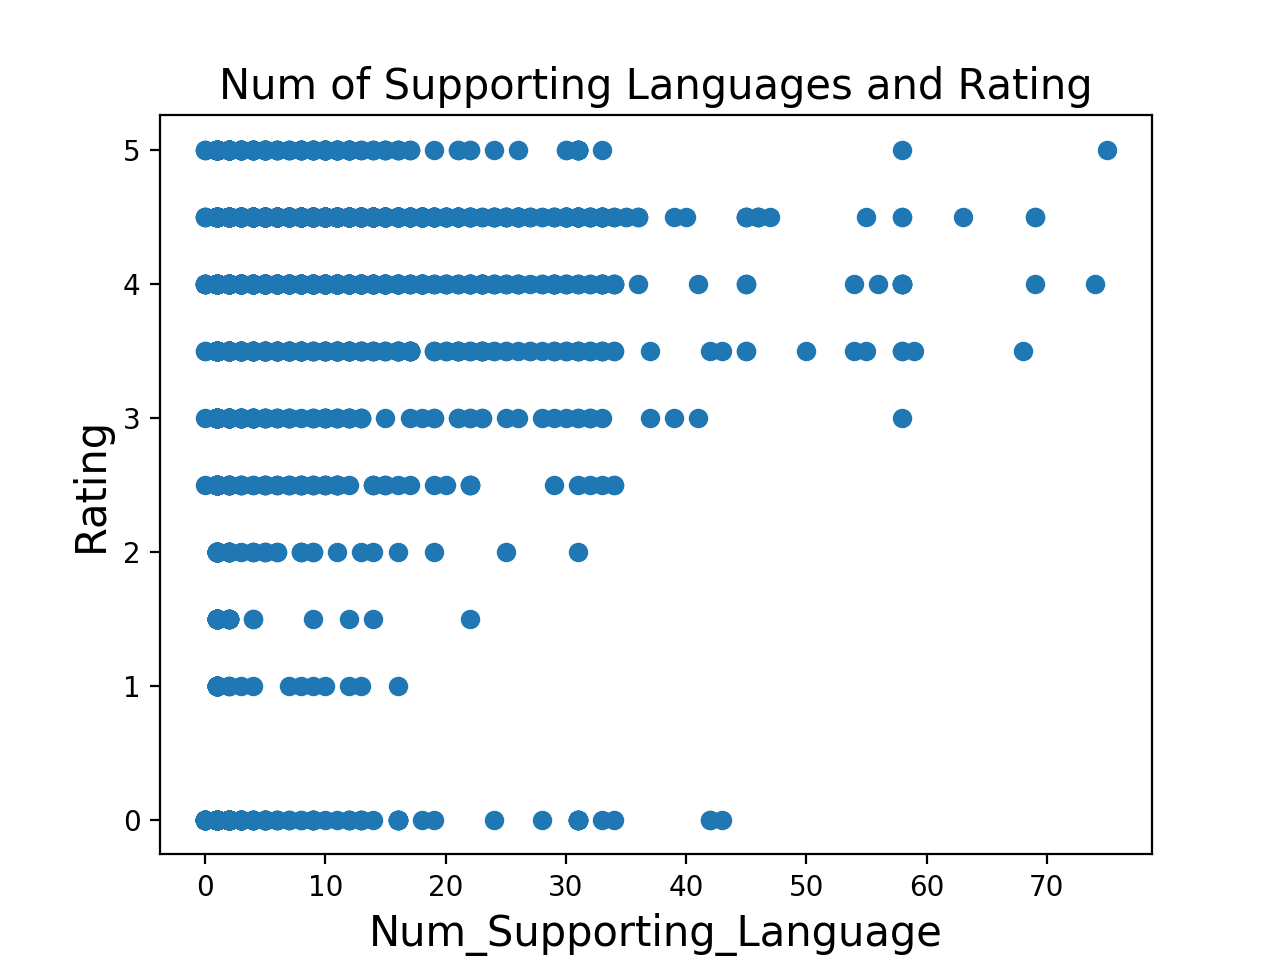

In [21]:
plt.figure()
plt.scatter('lang.num','user_rating',data = all_data)
plt.title('Num of Supporting Languages and Rating',fontsize = 15)
plt.xlabel('Num_Supporting_Language',fontsize = 15)
plt.ylabel('Rating',fontsize = 15)

When the app support more than 50 languages, it is very likely to get a higher rating.

### Number of Supporting Devices

<IPython.core.display.Javascript object>


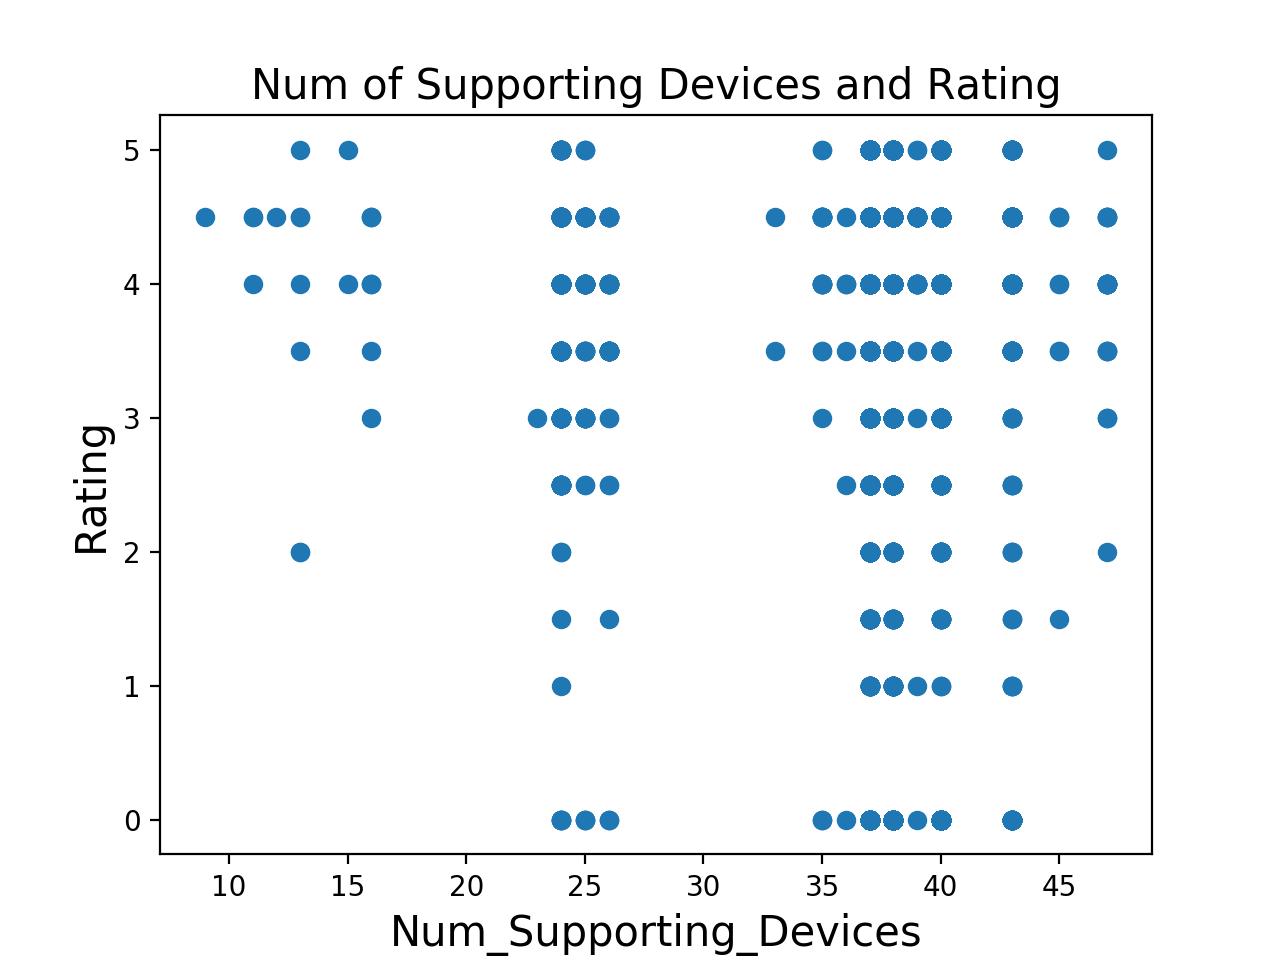

In [22]:
plt.figure()
plt.scatter('sup_devices.num','user_rating',data = all_data)
plt.title('Num of Supporting Devices and Rating',fontsize = 15)
plt.xlabel('Num_Supporting_Devices',fontsize = 15)
plt.ylabel('Rating',fontsize = 15)

This is an interesting finding. Contray to expectation, the app with smaller number of supporting devices get higher ratings. 

### Number of Images in App Description

In [23]:
all_data['ipadSc_urls.num'].value_counts()

5    4503
0    1387
4     710
3     286
2     156
1     155
Name: ipadSc_urls.num, dtype: int64

Most apps hive more than 3 screen shot images in app description.

<IPython.core.display.Javascript object>


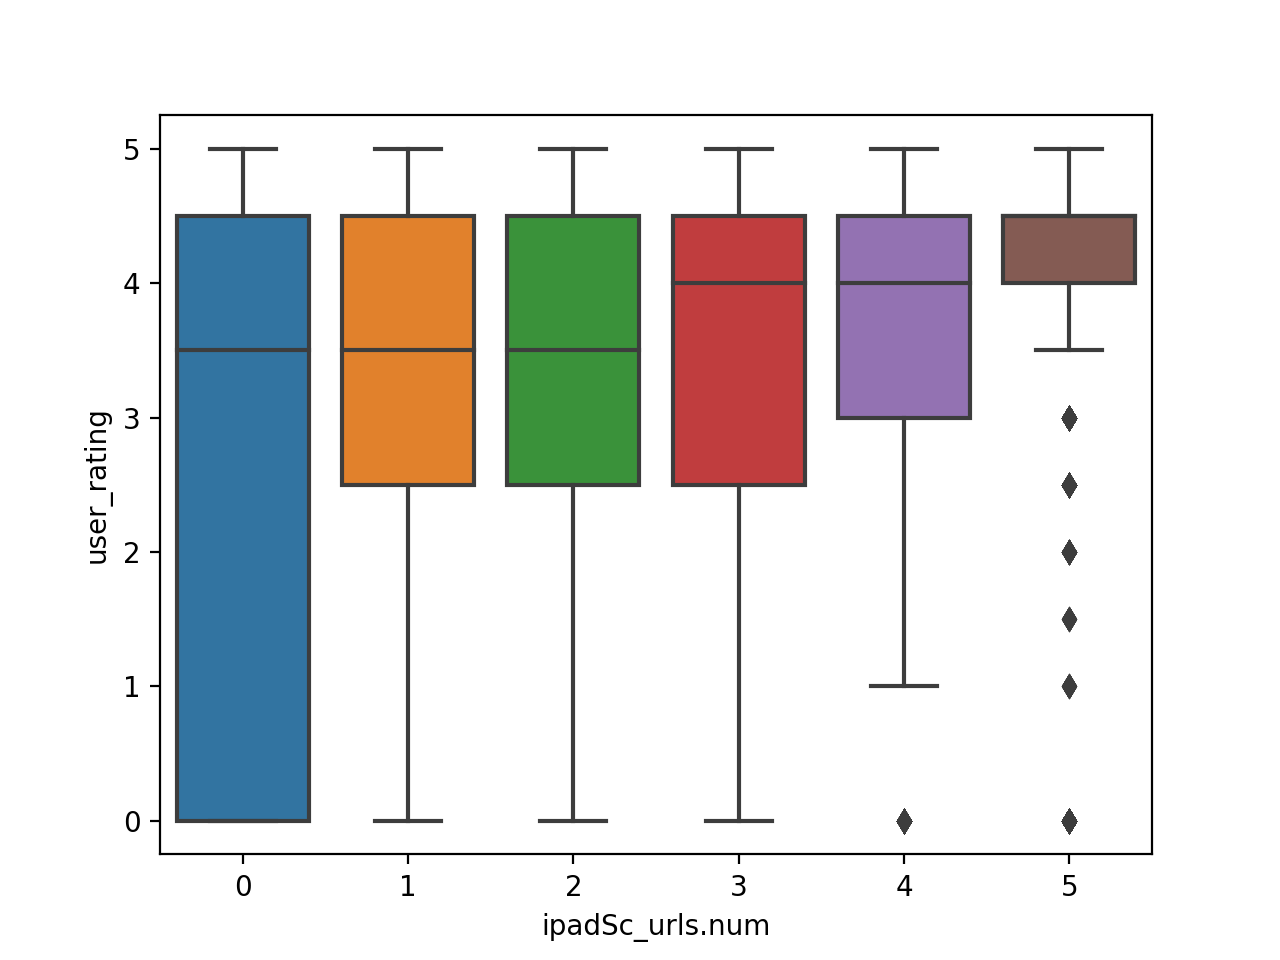

//anaconda/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [24]:
plt.figure()
sns.boxplot('ipadSc_urls.num','user_rating',data = all_data)

It seems the more detail offered in the app description, the more likely that higher ratings are given.

### Which numeric feature is the most relevant one?

In [35]:
all_numeric = all_data._get_numeric_data().drop(['id','size_bytes'],axis = 1)

<IPython.core.display.Javascript object>


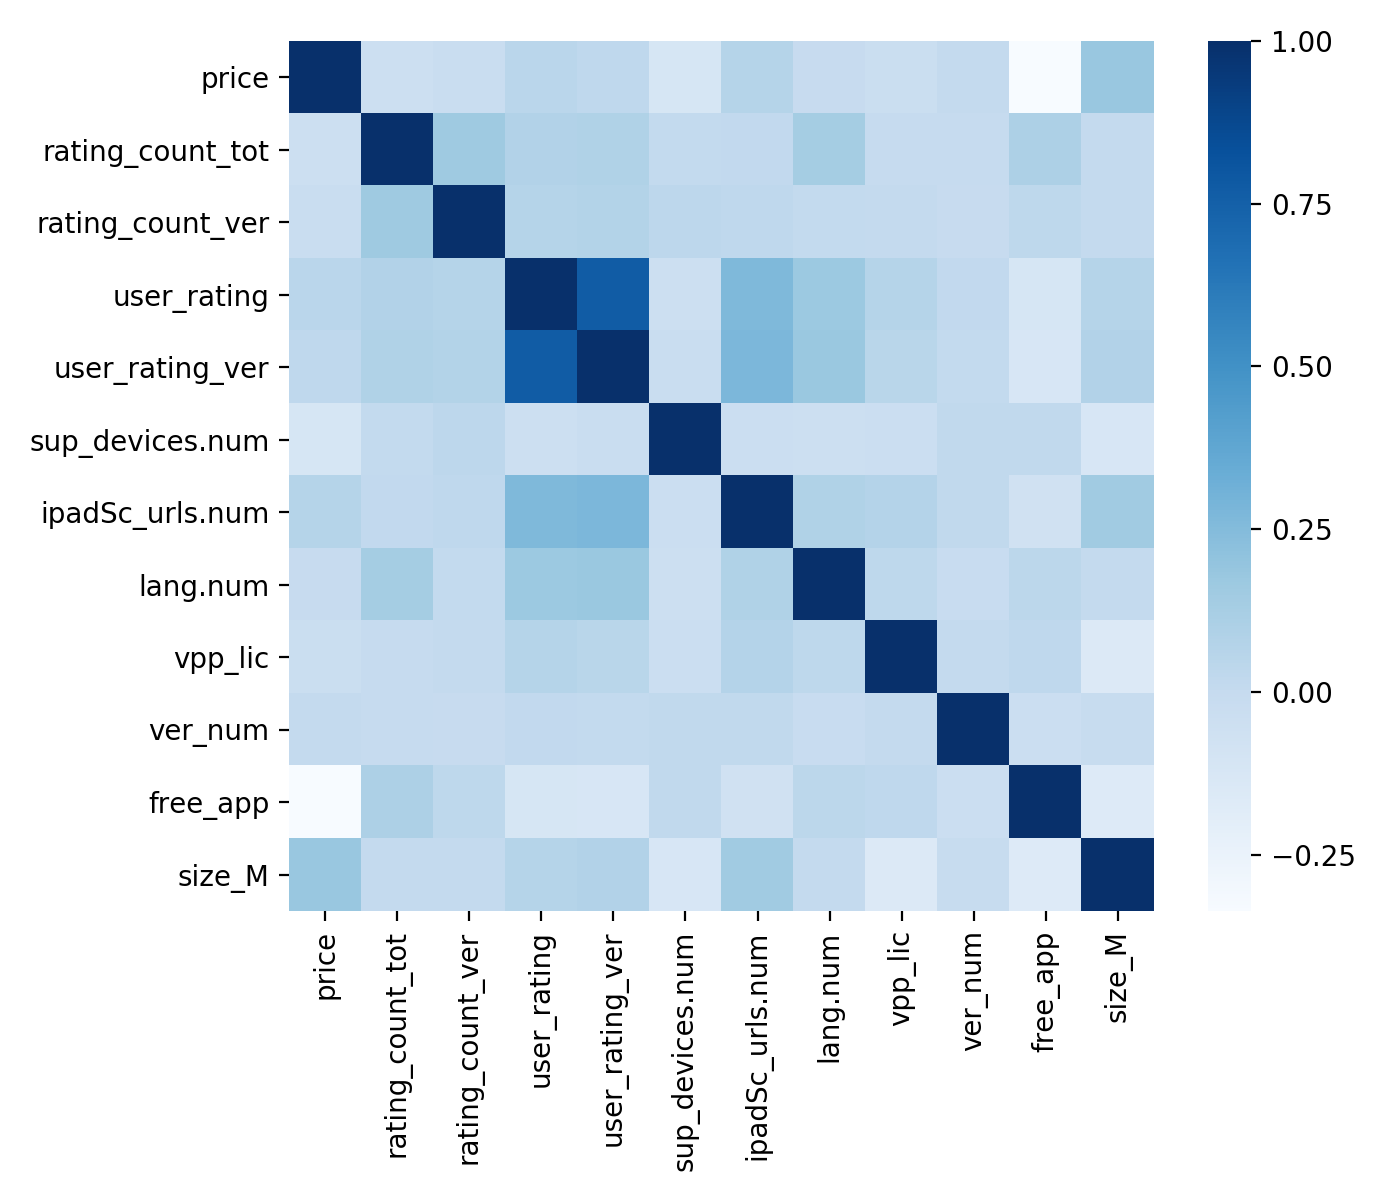

In [36]:
plt.figure(figsize = (7,6))
sns.heatmap(all_numeric.corr(),cmap = 'Blues')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.tight_layout()

Obviously, user rating and version user rating are the most correlated features.Besides that, number of screen shot images in the description is the next feature most correlated with the ratings, followed by the number of supported language.